# Set Seed for reproducability

In [1]:
import numpy as np
np.random.seed(42)

# Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import TensorBoard

Using TensorFlow backend.


# Load Data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() #We are loading data

In [3]:
x_train.shape #check how data structure is

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# 6000 samples for training data.
y_train.shape

(60000,)

In [6]:
y_train[0:99]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3], dtype=uint8)

In [7]:
# 10000 samples for testing data.
x_test.shape

(10000, 28, 28)

In [8]:
#Representation of the number in data set 
#To check what number is run y_test[0] which is a classification of number
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
# 10000 samples for testing data
y_test.shape

(10000,)

In [10]:
# We find that above representation was of number 7
y_test[0]

7

# Preprocess Data

In [11]:
# We are making 28 by 28 images into single vector of 784 and change type to float 32.
# Since Y is a single number only a classifier  we will not preprocess the Y.
x_train= x_train.reshape(60000, 784).astype('float32')

In [12]:
x_test= x_test.reshape(10000, 784).astype('float32')

In [13]:
x_test[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
x_train /= 255
x_test /= 255

In [15]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# We have a dta set of 10 numbers between 0-10
# Out put is a probability i.e it may say 100% its 5 or 60% its 5 and 40% looks like 9
# So we convert our Y data into an array of 10 digits
# This process is applicable when we have a non binary classification
n_classes=10
y_train=keras.utils.to_categorical(y_train, n_classes)
y_test=keras.utils.to_categorical(y_test,n_classes)

In [17]:
# Now we see that it gives us an array result and we have 1 at 7th Position
# So the number is 7
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Design neural network architecture

In [18]:
#We are building a sequential model here
#And then we are adding the layers and using the concerened activation function
#Mostly Relu is used as activation function but here for a simple model we are using sigmoid.
#In the output layer we are using "softemax" since it is a probabilty distribution as seen above
model=Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

In [19]:
tensorbrd=TensorBoard('logs/gaurav/p1')

# Configure Model

In [20]:
#We are using mean_squared_model to figure out deviation
#The actual value can be less than the target or more than the target to nullify that we are using squared model.
#For advanced models we use categorical cross entropy
model.compile(loss="mean_squared_error",optimizer=SGD(lr=0.01), metrics=['accuracy'])

# Train

In [21]:
#We train model on random samples of batches which is called as batch size
model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0954 - acc: 0.0965 - val_loss: 0.0931 - val_acc: 0.0847
Epoch 2/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0921 - acc: 0.0853 - val_loss: 0.0916 - val_acc: 0.0845
Epoch 3/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0911 - acc: 0.1026 - val_loss: 0.0909 - val_acc: 0.1153
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0905 - acc: 0.1339 - val_loss: 0.0904 - val_acc: 0.1511
Epoch 5/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.0901 - acc: 0.1658 - val_loss: 0.0900 - val_acc: 0.1787
Epoch 6/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0897 - acc: 0.1903 - val_loss: 0.0896 - val_acc: 0.2030
Epoch 7/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0894 - acc: 0.2132 - val_loss: 0.0892 - 

60000/60000 [==============================] - 3s 54us/step - loss: 0.0676 - acc: 0.5698 - val_loss: 0.0671 - val_acc: 0.5746
Epoch 60/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0672 - acc: 0.5743 - val_loss: 0.0666 - val_acc: 0.5787
Epoch 61/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0667 - acc: 0.5792 - val_loss: 0.0661 - val_acc: 0.5827
Epoch 62/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0662 - acc: 0.5836 - val_loss: 0.0656 - val_acc: 0.5877
Epoch 63/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0657 - acc: 0.5879 - val_loss: 0.0651 - val_acc: 0.5922
Epoch 64/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0652 - acc: 0.5923 - val_loss: 0.0646 - val_acc: 0.5964
Epoch 65/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0647 - acc: 0.5963 - val_loss: 0.0641 - val_acc: 0.6016
Epoch 66/100
60000/60000 [==============

In [22]:
# Here accuracy is 54.98 % which is not that great

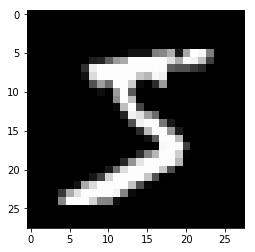

In [29]:
#displaying images can be done as follows
# We are again reshaping data into 28X28 bitmap 
import matplotlib.pyplot as plt
todisplay=x_train[0].reshape((28,28))
plt.imshow(todisplay, cmap='gray')
plt.show()